<a href="https://colab.research.google.com/github/03sans/Book_recommendations/blob/main/Book_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.25.2
!pip install scikit-surprise==1.1.3
!pip install scikit-learn==1.3.2
!pip install scipy==1.11.4

  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp311-cp311-linux_x86_64.whl size=3311745 sha256=6e83d0be9db6014d65bb003ac1eff33b4f58ad6897e0952fcf4dd99b8b16809b
  Stored in directory: /root/.cache/pip/wheels/f4/2b/26/e2a5eae55d3b7688995e66abe7f40473aac6c95ddd8ee174a8
Successfully built scikit-surprise
  Attempting uninstall: scikit-surprise
    Found existing installation: scikit-surprise 1.1.4
    Uninstalling scikit-surprise-1.1.4:
      Successfully uninstalled scikit-surprise-1.1.4
  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: 

In [2]:
#mounting drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing pandas and reading the necessary csv files
import pandas as pd

books = pd.read_csv('/content/drive/MyDrive/data/Books.csv', encoding='latin-1', sep=';', on_bad_lines='warn')
users = pd.read_csv('/content/drive/MyDrive/data/Users.csv', encoding='latin-1', sep=';', on_bad_lines='warn')
ratings = pd.read_csv('/content/drive/MyDrive/data/BookRatings.csv', encoding='latin-1', sep=';', on_bad_lines='warn')


In [4]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
#shape (271379, 8)
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271377 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [8]:
#checking for NaNs in the books dataset
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [9]:
#Making a safe copy of the original books dataset
books_cleaned = books.copy()

#Dropping unnecessary image columns
books_cleaned.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)

#Dropping rows with missing author or publisher
books_cleaned.dropna(subset=['Book-Author', 'Publisher'], inplace=True)

#Reseting index
books_cleaned.reset_index(drop=True, inplace=True)

books_cleaned.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company


In [10]:
#shape (278858, 3)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [11]:
#checking for NaNs in the users dataset
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


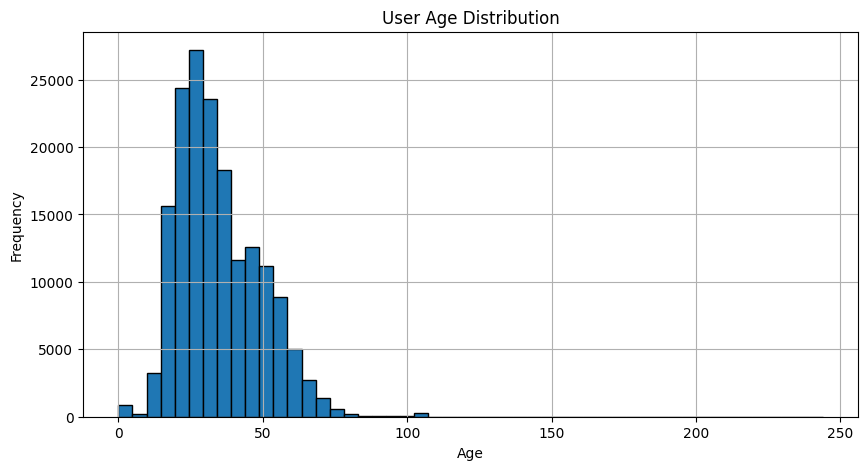

In [12]:
import matplotlib.pyplot as plt

users['Age'].dropna().plot(kind='hist', bins=50, figsize=(10, 5), edgecolor='black')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
users['Age'].describe()

,Age
count,168096.000000
mean,34.751434
std,14.428097
min,0.000000
25%,24.000000
50%,32.000000
75%,44.000000
max,244.000000


In [14]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [15]:
#Making a copy of the original users DataFrame
users_cleaned = users.copy()

#Dropping rows where Age is missing
users_cleaned = users_cleaned.dropna(subset=['Age'])

#Keeping only realistic ages (5 to 100)
users_cleaned = users_cleaned[(users_cleaned['Age'] >= 5) & (users_cleaned['Age'] <= 100)]

#Converting Age to int
users_cleaned['Age'] = users_cleaned['Age'].astype(int)

#Reseting index
users_cleaned.reset_index(drop=True, inplace=True)

print(users_cleaned['Age'].describe())

count    166848.000000
mean         34.746638
std          13.633051
min           5.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         100.000000
Name: Age, dtype: float64


In [16]:
users_cleaned.isnull().sum()

,0
User-ID,0
Location,0
Age,0


In [17]:
#shape (1149780, 3)
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [18]:
#checking for NaNs in the ratings dataset
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [19]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [20]:
#Keeping only explicit ratings (1 to 10)
ratings_cleaned = ratings[ratings['Book-Rating'] > 0].copy()
ratings_cleaned.reset_index(drop=True, inplace=True)
ratings_cleaned.head()

,User-ID,ISBN,Book-Rating
0,276726,0155061224,5
1,276729,052165615X,3
2,276729,0521795028,6
3,276736,3257224281,8
4,276737,0600570967,6


In [21]:
ratings_cleaned['Book-Rating'].unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [22]:
#Content-based recommender

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np

In [24]:
books_cb = books_cleaned.drop_duplicates(subset='Book-Title').reset_index(drop=True)
books_cb = books_cb.head(10000)

# TF-IDF vectorizer on book titles (lowercasing is by default)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books_cb['Book-Title'])

print("TF-IDF Matrix shape:", tfidf_matrix.shape)

TF-IDF Matrix shape: (10000, 11607)


In [25]:
# Compute similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [26]:
# Create a reverse map of indices and book titles
indices = pd.Series(books_cb.index, index=books_cb['Book-Title']).drop_duplicates()

In [27]:
import string

def get_recommendations(title, cosine_sim=cosine_sim, books_df=books_cb):
    # Normalize input: lowercase, strip, and remove punctuation
    title = title.strip().lower()
    title = title.translate(str.maketrans('', '', string.punctuation))

    # Normalize all titles in the dataset the same way
    normalized_titles = books_df['Book-Title'].str.lower().str.strip()
    normalized_titles = normalized_titles.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

    # Map normalized titles to indices
    normalized_indices = pd.Series(books_df.index, index=normalized_titles).drop_duplicates()

    idx = normalized_indices.get(title)

    if idx is None:
        return ["Book not found in dataset."]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    book_indices = [i[0] for i in sim_scores]

    return books_df['Book-Title'].iloc[book_indices].tolist()

In [28]:
get_recommendations("The Da Vinci Code")

['El Codigo Da Vinci / The Da Vinci Code',
 'Secrets of the Code: The Unauthorized Guide to the Mysteries Behind The Da Vinci Code',
 'The Da Vinci Legacy',
 'El desarrollo de Leonardo da Vinci (BiografÃ\xadas y memorias)',
 "The Devil's Code"]

In [29]:
get_recommendations("  THE DA VINCI CODE   ")

['El Codigo Da Vinci / The Da Vinci Code',
 'Secrets of the Code: The Unauthorized Guide to the Mysteries Behind The Da Vinci Code',
 'The Da Vinci Legacy',
 'El desarrollo de Leonardo da Vinci (BiografÃ\xadas y memorias)',
 "The Devil's Code"]

In [30]:
books_cb['Book-Title'].sample(10).tolist()

['This Day All Gods Die: The Gap into Ruin (Gap Series/Stephen R. Donaldson)',
 'Hamlet (Bantam Classics)',
 'Looking Back',
 'Tomorrow, When The War Began',
 'The Best of H. P. Lovecraft: Bloodcurdling Tales of Horror and the Macabre',
 "Spider's Web",
 'Ghost in the Graveyard (Sweet Valley Twins and Friends Super Chiller, No 2)',
 'Motoring With Mohammed: Journeys to Yemen and the Red Sea (Vintage Departures)',
 'Be Cool',
 'The Vineyard : A Novel']

In [31]:
get_recommendations("the da vinci code.")

['El Codigo Da Vinci / The Da Vinci Code',
 'Secrets of the Code: The Unauthorized Guide to the Mysteries Behind The Da Vinci Code',
 'The Da Vinci Legacy',
 'El desarrollo de Leonardo da Vinci (BiografÃ\xadas y memorias)',
 "The Devil's Code"]

In [32]:
get_recommendations("THE da VINCI CODE")

['El Codigo Da Vinci / The Da Vinci Code',
 'Secrets of the Code: The Unauthorized Guide to the Mysteries Behind The Da Vinci Code',
 'The Da Vinci Legacy',
 'El desarrollo de Leonardo da Vinci (BiografÃ\xadas y memorias)',
 "The Devil's Code"]

In [33]:
#Collaborative filtering recommender

In [35]:
from surprise import Dataset, Reader
import pandas as pd

#Using ratings_cleaned from earlier
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_cleaned[['User-ID', 'ISBN', 'Book-Rating']], reader)

In [36]:
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Split into train/test
trainset, testset = train_test_split(data, test_size=0.2)

# Build and train model
model = SVD()
model.fit(trainset)

# Evaluate
predictions = model.test(testset)
print("RMSE:", accuracy.rmse(predictions))

RMSE: 1.6365
RMSE: 1.6364855135917122


In [38]:
# Recommend top N books for a given user
def get_collab_recommendations(user_id, model, ratings_df, books_df, n=5):
    # Get books the user hasn't rated
    user_rated_books = ratings_df[ratings_df['User-ID'] == user_id]['ISBN'].tolist()
    all_books = books_df['ISBN'].unique()
    books_to_predict = [isbn for isbn in all_books if isbn not in user_rated_books]

    # Predict ratings for unseen books
    predictions = [ (isbn, model.predict(user_id, isbn).est) for isbn in books_to_predict ]

    # Sort by predicted rating
    predictions.sort(key=lambda x: x[1], reverse=True)
    top_isbns = [isbn for isbn, _ in predictions[:n]]

    # Get book titles
    recommended_titles = books_df[books_df['ISBN'].isin(top_isbns)]['Book-Title'].tolist()
    return recommended_titles

In [39]:
ratings_cleaned['User-ID'].sample(10).tolist()

[129074, 48268, 38281, 88793, 59727, 93691, 93696, 12538, 216012, 232320]

In [40]:
get_collab_recommendations(user_id=129074, model=model, ratings_df=ratings_cleaned, books_df=books_cleaned)

['A Prayer for Owen Meany',
 'The Hobbit : The Enchanting Prelude to The Lord of the Rings',
 'The Return of the King (The Lord of the Rings, Part 3)',
 'Weirdos From Another Planet!',
 'Harry Potter and the Chamber of Secrets Postcard Book']

In [41]:
import joblib

joblib.dump(model, 'svd_model.pkl')

['svd_model.pkl']

In [42]:
books_cleaned.to_csv('books_cleaned.csv', index=False)
ratings_cleaned.to_csv('ratings_cleaned.csv', index=False)

In [43]:
from google.colab import files
files.download('svd_model.pkl')
files.download('books_cleaned.csv')
files.download('ratings_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>